In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
import random

In [6]:
X,y = make_blobs(centers=3, random_state=42)

In [7]:
class Cluster:
    
    def __init__(self, center, label):
        self.center =  center
        self.label = label
        self.points = []
    
    def relocate(self):
        self.center = np.mean(self.points,axis=0)
        self.points= []
    
    def distance(self, point):
        return np.sqrt(((self.center-point)**2).sum())
        
        

In [31]:
class KMeansCustom:
    
    def __init__(self, n_clusters=3, max_iters=20,n_init=10):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.n_init = n_init
    
    def fit(self,X):
        
        self.__X = X
        steps = []
        
        for simulation in range(self.n_clusters):
            clusters =[]
            
            for i in range(self.n_clusters):
                cluster = Cluster(random.choice(X),i)
                clusters.append(cluster)
        
            errors =[]
        
            for i in range(self.max_iters):
                labels = []
            
                for point in X:
                    distances =[]
                
                    for cluster in clusters:
                        dis = cluster.distance(point)
                        distances.append((dis,cluster))

                    index = np.array(distances)[:,0].argmin()
                    selected_dis, selected_cluster = distances[index]
                    selected_cluster.points.append(point)
                    labels.append(selected_cluster.label)
            
            
                for cluster in clusters:
                    cluster.relocate()
            
                error.append(self.error(labels,clusters))
        
            final_error = error[-1]
            steps.append((final_error, labels, clusters))
        
        index = np.array(steps)[:,0].argmin()
        result_err, result_labels, result_clusters =steps[index]
    
        self.labels = result_labels
        self.cluster_centers_ = [cluster.center for cluster in result_clusters]
    
        return result_err

    def error(self, labels, clusters):
        error =0
        
        for point,label in zip(self.__X,labels):
            cluster = clusters[label]
            error += cluster.distance(point)
            
        return error
        

 
    
    

In [14]:
random.choice(X)

array([2.02013373, 2.79507219])

In [33]:
errors = []

for i in range(2,7):
    model = KMeansCustom(i,n_init=10)
    err = model.fit(X)
    errors.append(err)

C:\Users\shivang\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
errors

[378.97856787197094,
 117.64800966133758,
 108.91142926445669,
 100.2592572746354,
 95.52334990884256]

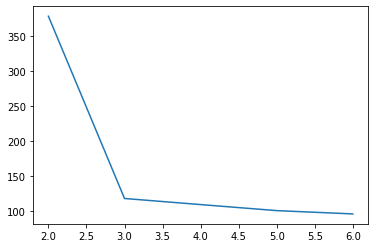

In [35]:
plt.plot(np.arange(2,7),errors)

C:\Users\shivang\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


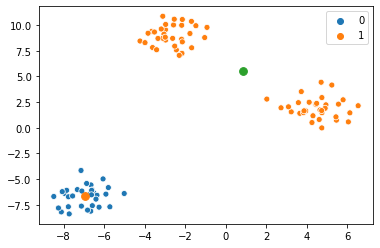

In [39]:
model = KMeansCustom(n_clusters=2)
model.fit(X)
y_gen = model.labels
sns.scatterplot(X[:,0],X[:,1],hue=y_gen)
for center in model.cluster_centers_:
    plt.scatter(center[0],center[1], s=60)